Libraries imported successfully.
Processed dataset loaded successfully.
Shape of the dataset: (73996, 5)


,date,text,processed_text,vader_score,vader_label
0,2024-01-01 00:00:00,im getting on borderlands and i will murder yo...,im getting borderlands murder,-0.6908,Negative
1,2024-01-01 01:00:00,I am coming to the borders and I will kill you...,coming borders kill,-0.6908,Negative
2,2024-01-01 02:00:00,im getting on borderlands and i will kill you ...,im getting borderlands kill,-0.6908,Negative
3,2024-01-01 03:00:00,im coming on borderlands and i will murder you...,im coming borderlands murder,-0.6908,Negative
4,2024-01-01 04:00:00,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder,-0.6908,Negative



--- Generating Time-Series Plot ---


alt.Chart(...)


--- Generating Sentiment Distribution Donut Chart ---


alt.Chart(...)


--- Generating Word Clouds for Positive and Negative Sentiment ---


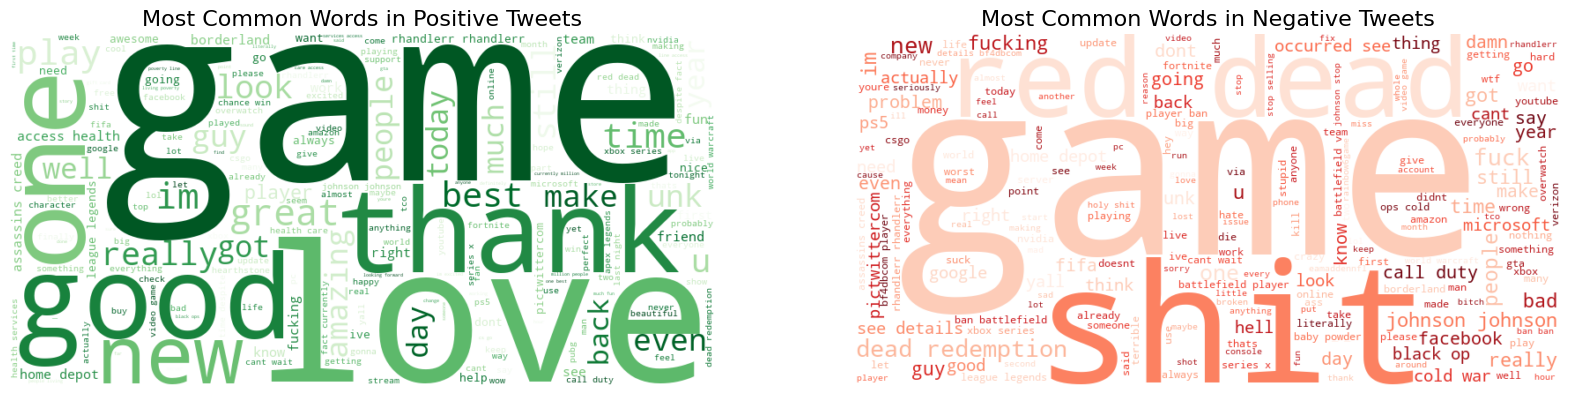

In [2]:
# In a real Jupyter Notebook, each commented section would be a separate cell.

# --- Cell 1: Import Libraries ---
import pandas as pd
import altair as alt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configure altair to work in notebooks
alt.renderers.enable('default')

print("Libraries imported successfully.")


# --- Cell 2: Load the Processed Dataset ---
# This is the cleaned data file we created in the previous notebook.
file_path = '../data/processed/cleaned_sentiment_data.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['date'])
    print("Processed dataset loaded successfully.")
    print(f"Shape of the dataset: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please run the '02_preprocessing_analysis.ipynb' notebook first to generate this file.")
    df = None


# --- Cell 3: Visualization 1 - Sentiment Trend Over Time ---
if df is not None:
    print("\n--- Generating Time-Series Plot ---")
    
    # Resample the data by day and calculate the mean sentiment score
    # Setting the date as the index is crucial for resampling
    daily_sentiment = df.set_index('date')['vader_score'].resample('D').mean().reset_index()

    # Create the Altair chart
    time_series_chart = alt.Chart(daily_sentiment).mark_line(
        point=True,
        strokeWidth=2
    ).encode(
        x=alt.X('date:T', title='Date'),
        y=alt.Y('vader_score:Q', title='Average Sentiment Score', scale=alt.Scale(domain=[-1, 1])),
        tooltip=[
            alt.Tooltip('date:T', title='Date'),
            alt.Tooltip('vader_score:Q', title='Avg. Score', format='.2f')
        ]
    ).properties(
        title='Daily Average Sentiment Trend',
        width='container'
    ).interactive()

    # Display the chart
    display(time_series_chart)


# --- Cell 4: Visualization 2 - Overall Sentiment Distribution ---
if df is not None:
    print("\n--- Generating Sentiment Distribution Donut Chart ---")
    
    sentiment_counts = df['vader_label'].value_counts().reset_index()
    sentiment_counts.columns = ['vader_label', 'count']

    distribution_chart = alt.Chart(sentiment_counts).mark_arc(
        innerRadius=70, # This creates the donut shape
        outerRadius=120
    ).encode(
        theta=alt.Theta(field="count", type="quantitative"),
        color=alt.Color(field="vader_label", type="nominal",
                        scale=alt.Scale(
                            domain=['Positive', 'Negative', 'Neutral'],
                            range=['#2ca02c', '#d62728', '#ff7f0e'] # Green, Red, Orange
                        ),
                        legend=alt.Legend(title="Sentiment")),
        tooltip=['vader_label', 'count']
    ).properties(
        title='Overall Sentiment Distribution'
    )

    display(distribution_chart)


# --- Cell 5: Visualization 3 - Word Clouds ---
if df is not None:
    print("\n--- Generating Word Clouds for Positive and Negative Sentiment ---")

    # Separate text by sentiment
    positive_text = " ".join(text for text in df[df['vader_label'] == 'Positive']['processed_text'])
    negative_text = " ".join(text for text in df[df['vader_label'] == 'Negative']['processed_text'])

    # Create WordCloud objects
    wc_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
    wc_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

    # Plot the word clouds
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    # Positive Word Cloud
    axes[0].imshow(wc_positive, interpolation='bilinear')
    axes[0].set_title('Most Common Words in Positive Tweets', fontsize=16)
    axes[0].axis('off')

    # Negative Word Cloud
    axes[1].imshow(wc_negative, interpolation='bilinear')
    axes[1].set_title('Most Common Words in Negative Tweets', fontsize=16)
    axes[1].axis('off')

    plt.show()

